Blah Blah TEXT

In [2]:
import nengo
import nengo.spa
#import pandas
import numpy as np
#import seaborn as sns
import matplotlib.pyplot as plt
import pylab
%matplotlib inline

In [3]:
import second_pass as main
reload (main)
#type(main.model.vision_system.V1)

<module 'second_pass' from 'second_pass.pyc'>

In [4]:
sim = nengo.Simulator(main.model)
sim.run(3)

Simulation finished in 0:00:37.                                                 


V1 delay =  3  1004


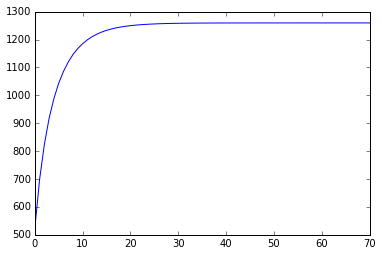

In [5]:
# Please do not execute me
V1_data = sim.data[main.V1_probe]
v1_similarity = np.dot(V1_data, main.image_list[0])
pylab.plot(v1_similarity)
axes = plt.gca()
axes.set_xlim([0, 70])

V1_lat = np.where(v1_similarity >= ((v1_similarity.max() + v1_similarity.min())/2))[0]
V1_start, V1_end = V1_lat [0], V1_lat[-1]
print 'V1 delay = ', V1_start,'', V1_end

(3000, 32)
AIT delay =  16 , 1009


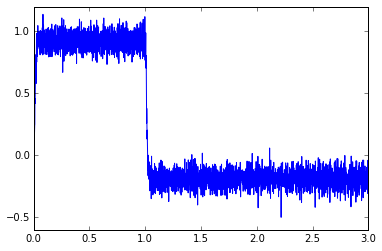

In [6]:
# Please execute me 
AIT_data = sim.data[main.AIT_probe]
print(AIT_data.shape)
AIT_similarity = main.model.get_output_vocab('wm').parse('FATIGUE').v
x = np.dot(AIT_data, AIT_similarity)
pylab.plot(sim.trange(), x)

AIT_lat = np.where(x >= x.max()/2)[0]
AIT_start = AIT_lat [0]
AIT_end = AIT_lat[-1]
print "AIT delay = ", AIT_start,",", AIT_end

(3000, 1)
37 , 1030


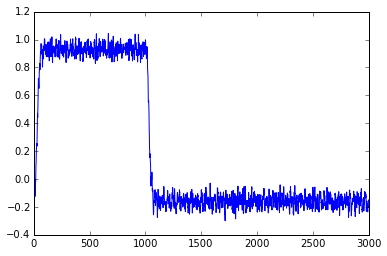

In [7]:
PFC_data = sim.data[main.PFC_probe]
print(PFC_data.shape)
pylab.plot(PFC_data)
PFC_lat = np.where(PFC_data >= PFC_data.max()/2)[0]
PFC_start = PFC_lat [0]
PFC_end = PFC_lat [-1]
print PFC_start,',', PFC_end

(3000, 32)
61 1114


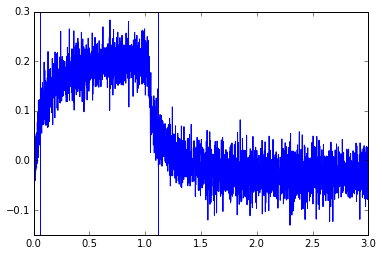

In [8]:
PMC_data = sim.data[main.PMC_probe]
print(PMC_data.shape)
y = np.dot(PMC_data, main.model.get_output_vocab('result').parse('SAME').v)
pylab.plot(sim.trange(), y)

PMC_lat = np.where(y >= y.max()/2)[0]
PMC_start = PMC_lat [0]
PMC_end = PMC_lat [-1]
pylab.axvline(sim.trange()[PMC_start])
pylab.axvline(sim.trange()[PMC_end])
#pylab.plot(PMC_start)
print PMC_start, PMC_end

(3000, 32)
65


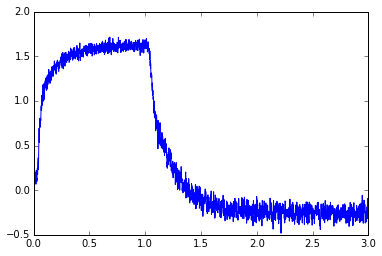

In [9]:
MC_data = sim.data[main.MC_probe]
print (MC_data.shape)
r = np.dot(MC_data, main.model.motor_system.motor_vocab.parse('PUSH').v)
pylab.plot(sim.trange(), r)

MC_lat = np.where(r >= r.max()/2)[0]
MC_start = MC_lat[0]
print(MC_start)

(3000, 32)


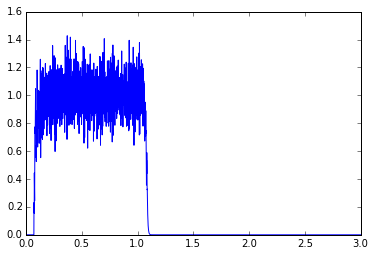

In [10]:
finger_data = sim.data[main.finger_probe]
print(finger_data.shape)
pylab.plot(sim.trange(), np.dot(finger_data, main.model.motor_system.finger_vocab.parse('F1').v))

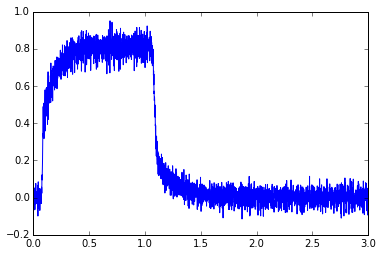

In [11]:
final_data = sim.data[main.final_probe]
pylab.plot(sim.trange(), final_data)

In [17]:
retina_to_V1 = V1_start
V1_to_AIT = AIT_start - V1_start
AIT_to_PFC = PFC_start - AIT_start
PFC_to_PMC = PMC_start - PFC_start
PMC_to_MC = MC_start - PMC_start
print(AIT_to_PFC)

21
